
---
Performing EDA(Exploratory Data Analysis) on Final/Aggregated table(Vendor_Sales_Summary)

---

In [9]:
import pandas as pd
import pyodbc as odbc
from sqlalchemy import create_engine
from sqlalchemy.engine import URL

# Connection details
server = 'DHRUV'       
database = 'VendorPerformance'  
User='sa'
password='Dhruv@3850'

# connection string
connection_string = f"""
Driver={{ODBC Driver 17 for SQL Server}};
Server={server};
Database={database};
Trusted_Connection=yes;
uid={User};
pwd={password}
"""

connection_url=URL.create("mssql+pyodbc",query={"odbc_connect":connection_string})
conn = create_engine(connection_url,module=odbc)

In [10]:
tables= pd.read_sql("SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'",conn)
tables= tables['TABLE_NAME'].tolist()
tables

['begin_inventory',
 'end_inventory',
 'purchase_prices',
 'purchases',
 'sales',
 'vendor_invoice',
 'Vendor_Sales_Summary']

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats


---
Importing the Final table from MSSQL databae 

---

In [12]:
vendor_sales_summary = pd.read_sql_query('select * from Vendor_Sales_Summary',conn)
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.270000,36.990002,1750.0,145080,3811251.50,142049.0,672819.312500,5.101920e+06,260999.203125,68601.679688,1.290668e+06,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.190001,28.990000,1750.0,164038,3804041.25,160247.0,561512.375000,4.819074e+06,294438.656250,144929.234375,1.015032e+06,21.062809,0.976889,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.240000,24.990000,1750.0,187407,3418303.75,187140.0,461140.156250,4.538120e+06,343854.062500,123780.218750,1.119817e+06,24.675785,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.170000,22.990000,1750.0,201682,3261198.00,200412.0,420050.000000,4.475973e+06,368242.812500,257032.062500,1.214775e+06,27.139908,0.993703,1.372494
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.889999,29.990000,1750.0,138109,3023206.00,135838.0,545778.250000,4.223108e+06,249587.828125,257032.062500,1.199902e+06,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.320000,4.990000,750.0,2,2.64,5.0,10.960000,1.595000e+01,0.550000,27100.410156,1.331000e+01,83.448273,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.390000,0.490000,50.0,6,2.34,134.0,1.470000,6.566000e+01,7.040000,50293.621094,6.332000e+01,96.436188,22.333334,28.059830
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.740000,0.990000,50.0,2,1.48,2.0,0.990000,1.980000e+00,0.100000,14069.870117,5.000000e-01,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.470000,1.990000,200.0,1,1.47,72.0,77.610001,1.432800e+02,15.120000,257032.062500,1.418100e+02,98.974037,72.000000,97.469391


In [13]:
vendor_sales_summary.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.00000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.00000,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269376,0.36000,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,35.643671,148.246018,0.49000,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,847.360550,664.309212,50.00000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.00000,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.693376,123067.799739,0.71000,453.457489,3655.464966,20738.245117,3.811252e+06
TotalSalesQuantity,10692.0,3077.482136,10952.851391,0.00000,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesPrice,10692.0,18793.783618,44952.773365,0.00000,289.709991,2857.800049,16059.562500,6.728193e+05
TotalSalesDollars,10692.0,42239.074397,167655.265792,0.00000,729.220016,5298.044922,28396.914551,5.101920e+06


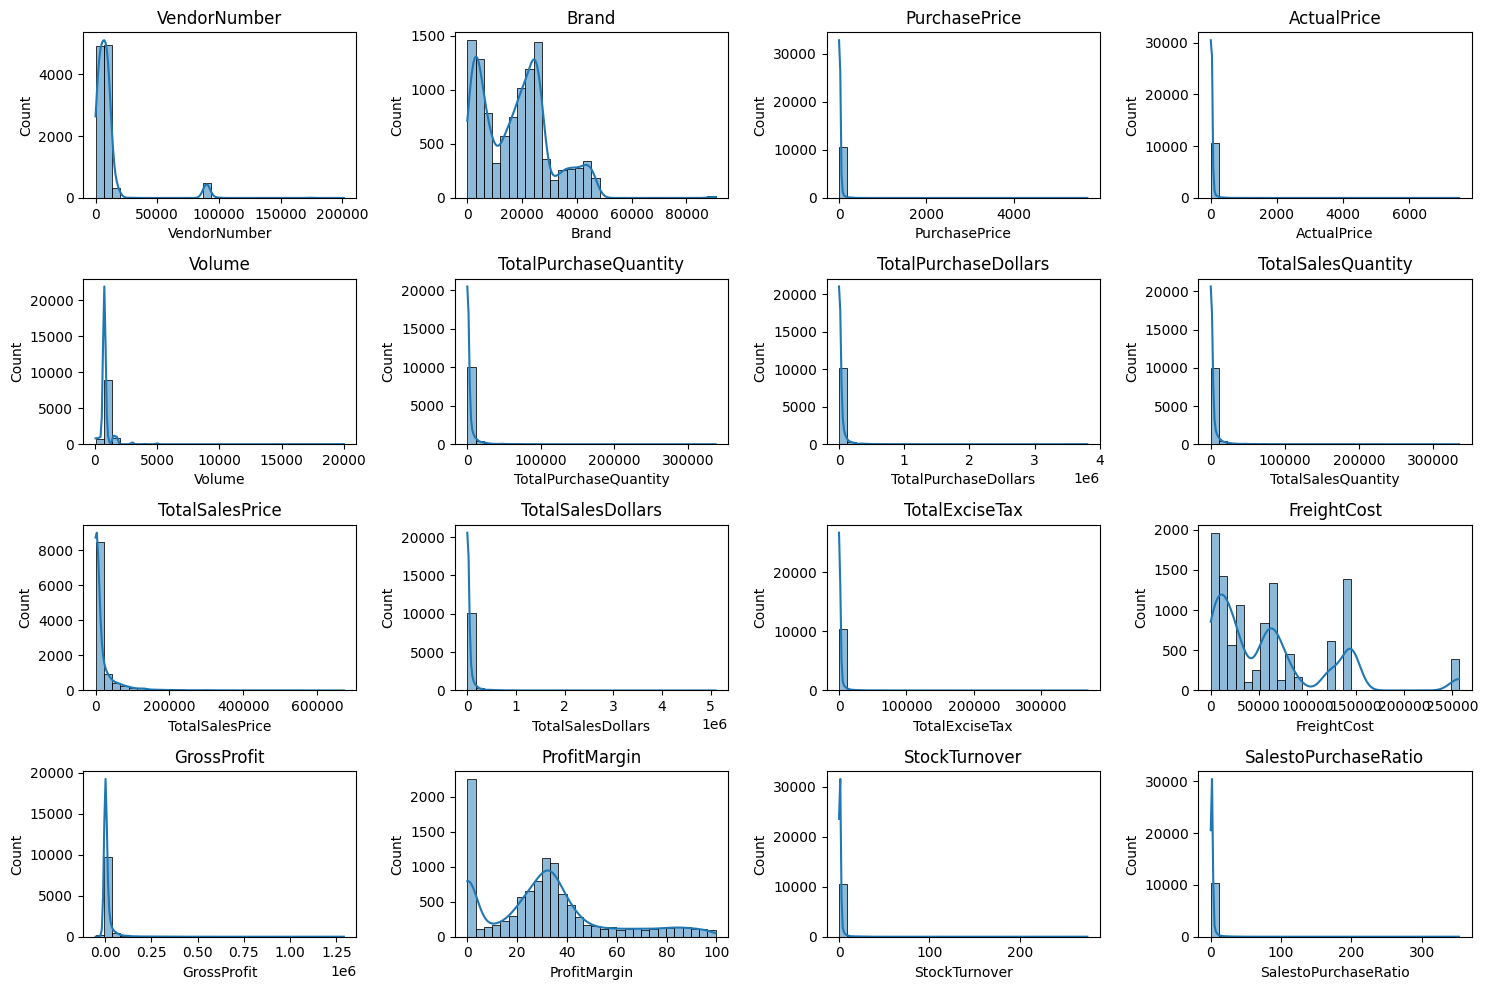

In [14]:
numerical_cols=vendor_sales_summary.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in  enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(vendor_sales_summary[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

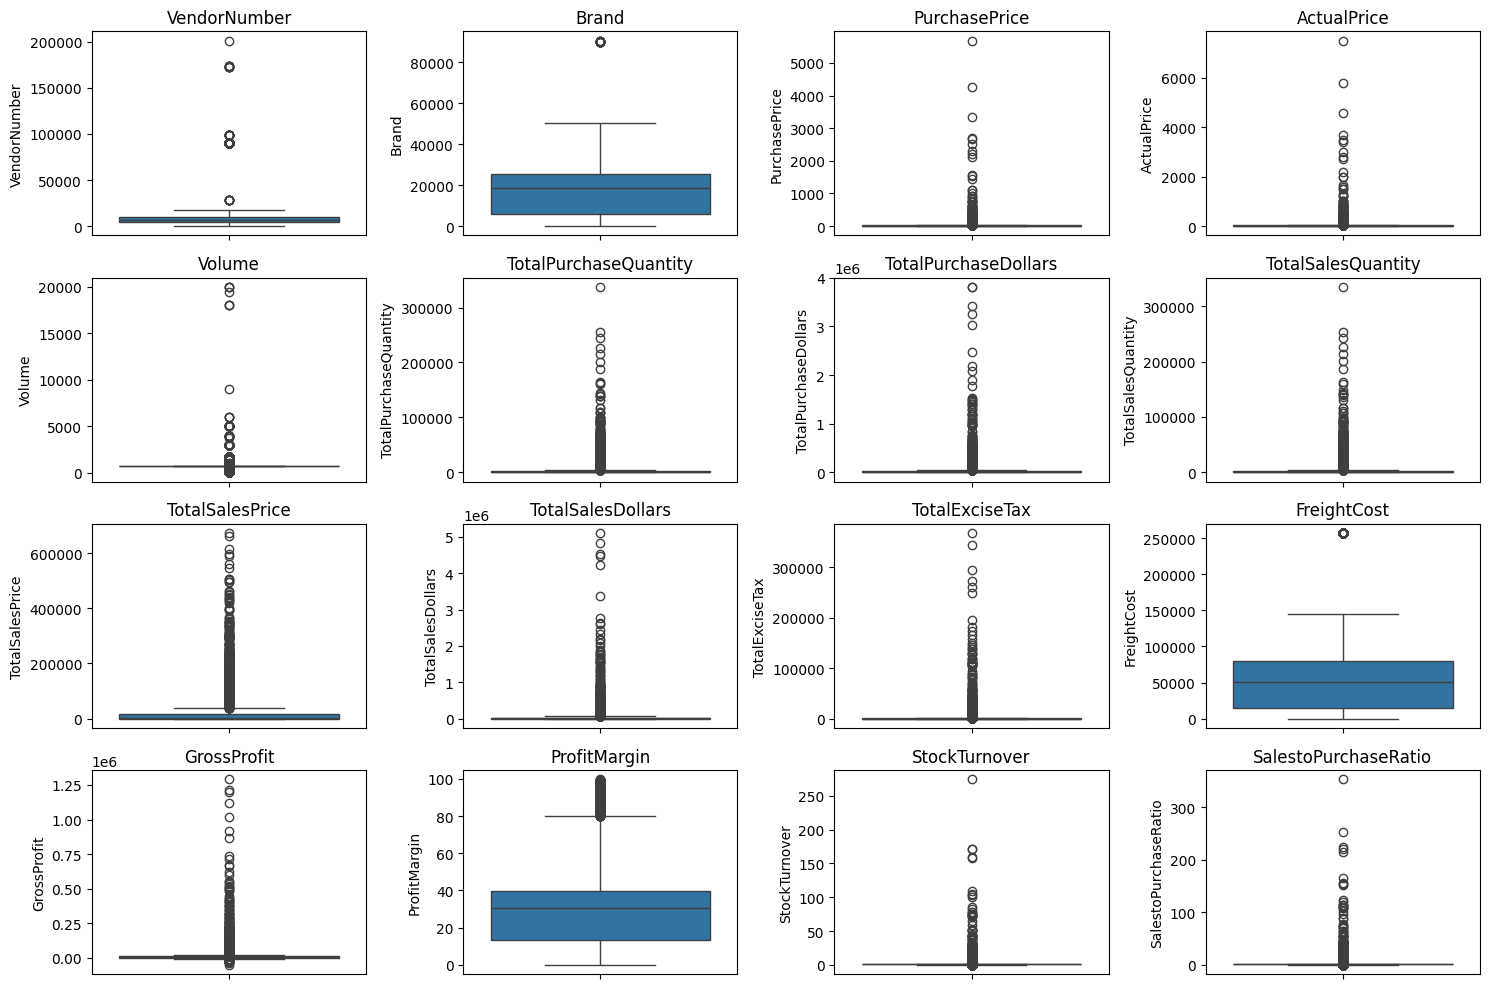

In [15]:

plt.figure(figsize=(15,10))
for i,col in  enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=vendor_sales_summary[col])
    plt.title(col)
plt.tight_layout()
plt.show()


---
Insights 

---

**Negative & Zero Values:**

* **Gross Profit:** Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or the product was not sold.Hence the GrossProfit is negative. 
* **Profit Margin:** Had a minimum of -∞, which suggests cases where the product was not sold after purchasing it. Hence I had replaced those -∞ values with 0 . Because if the product is not sold then there will be no profit margin.
* **Total Sales Quantity & Sales Dollars:** Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

**Outliers Indicated by High Standard Deviations:**

* **Purchase & Actual Prices:** The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
* **Freight Cost:** Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
* **Stock Turnover:** Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

---


Filter data by removing inconsistencies

In [16]:
df = pd.read_sql_query("""SELECT * FROM Vendor_Sales_Summary
                       WHERE GrossProfit > 0 
                       AND ProfitMargin > 0 
                       AND TotalSalesQuantity > 0""",conn)

df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.270000,36.990002,1750.0,145080,3811251.50,142049.0,672819.312500,5.101920e+06,260999.203125,68601.679688,1.290668e+06,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.190001,28.990000,1750.0,164038,3804041.25,160247.0,561512.375000,4.819074e+06,294438.656250,144929.234375,1.015032e+06,21.062809,0.976889,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.240000,24.990000,1750.0,187407,3418303.75,187140.0,461140.156250,4.538120e+06,343854.062500,123780.218750,1.119817e+06,24.675785,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.170000,22.990000,1750.0,201682,3261198.00,200412.0,420050.000000,4.475973e+06,368242.812500,257032.062500,1.214775e+06,27.139908,0.993703,1.372494
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.889999,29.990000,1750.0,138109,3023206.00,135838.0,545778.250000,4.223108e+06,249587.828125,257032.062500,1.199902e+06,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.320000,4.990000,750.0,2,2.64,5.0,10.960000,1.595000e+01,0.550000,27100.410156,1.331000e+01,83.448273,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.390000,0.490000,50.0,6,2.34,134.0,1.470000,6.566000e+01,7.040000,50293.621094,6.332000e+01,96.436188,22.333334,28.059830
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.740000,0.990000,50.0,2,1.48,2.0,0.990000,1.980000e+00,0.100000,14069.870117,5.000000e-01,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.470000,1.990000,200.0,1,1.47,72.0,77.610001,1.432800e+02,15.120000,257032.062500,1.418100e+02,98.974037,72.000000,97.469391


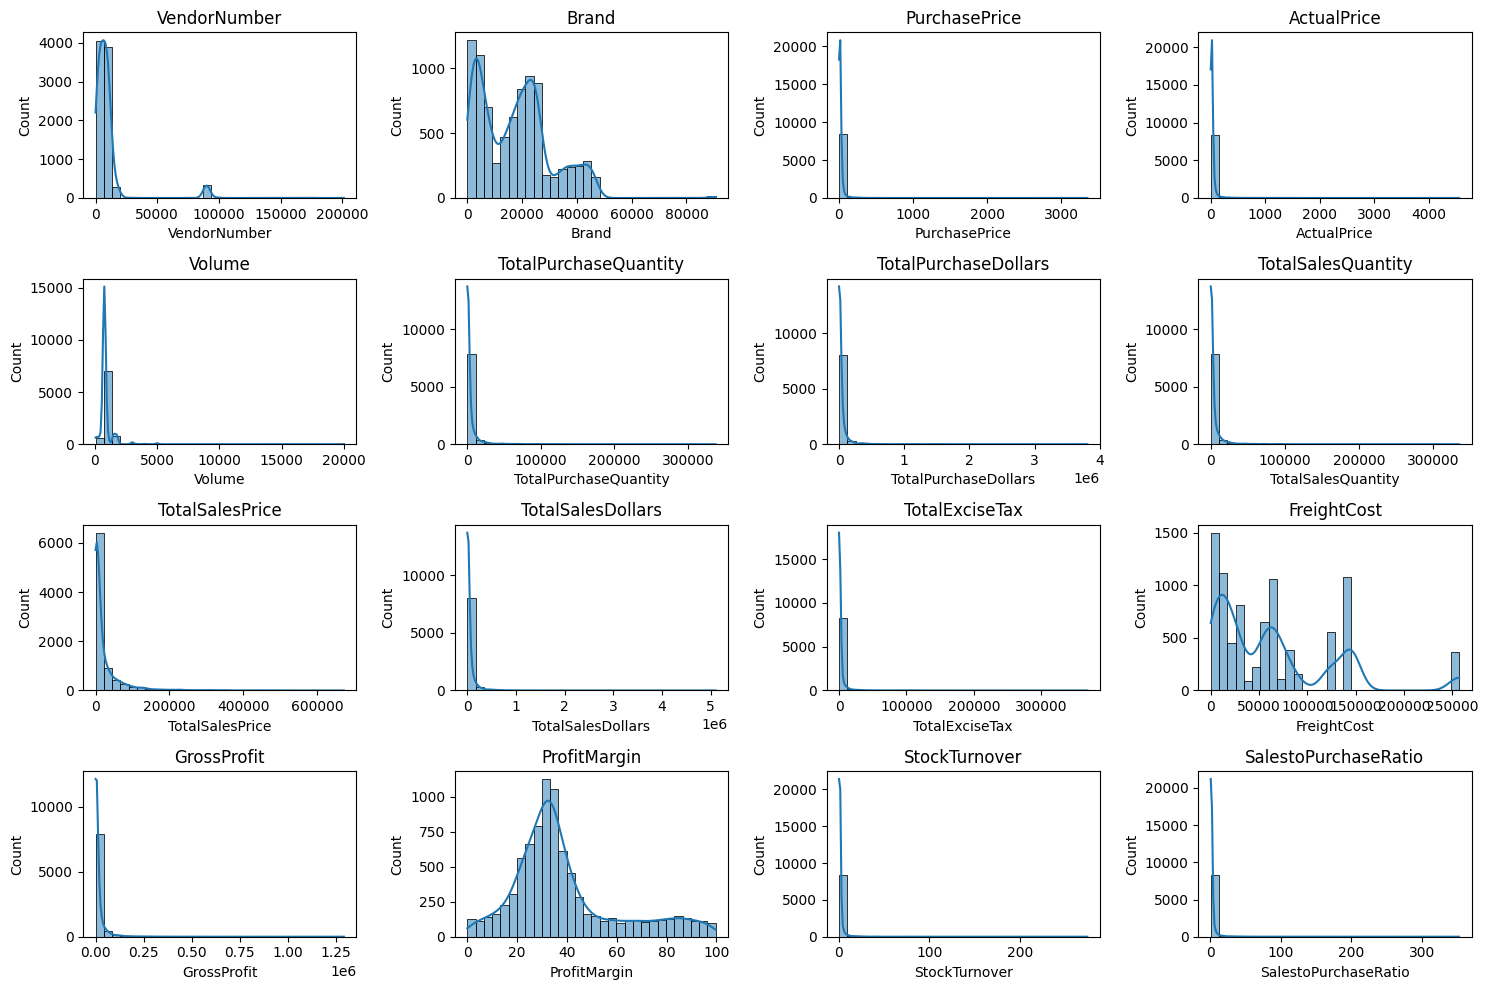

In [17]:
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in  enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

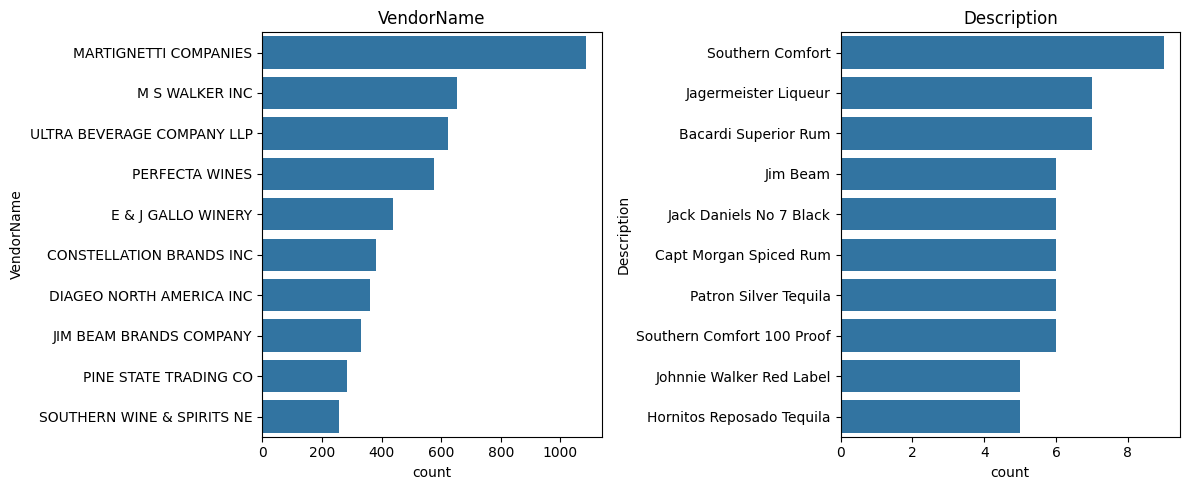

In [18]:
categorical_cols =['VendorName','Description']
plt.figure(figsize=(12,5))
for i, cols in enumerate(categorical_cols):
    plt.subplot(1,2, i+1)
    sns.countplot(y=df[cols],order=df[cols].value_counts().index[:10])
    plt.title(cols)
plt.tight_layout()
plt.show()

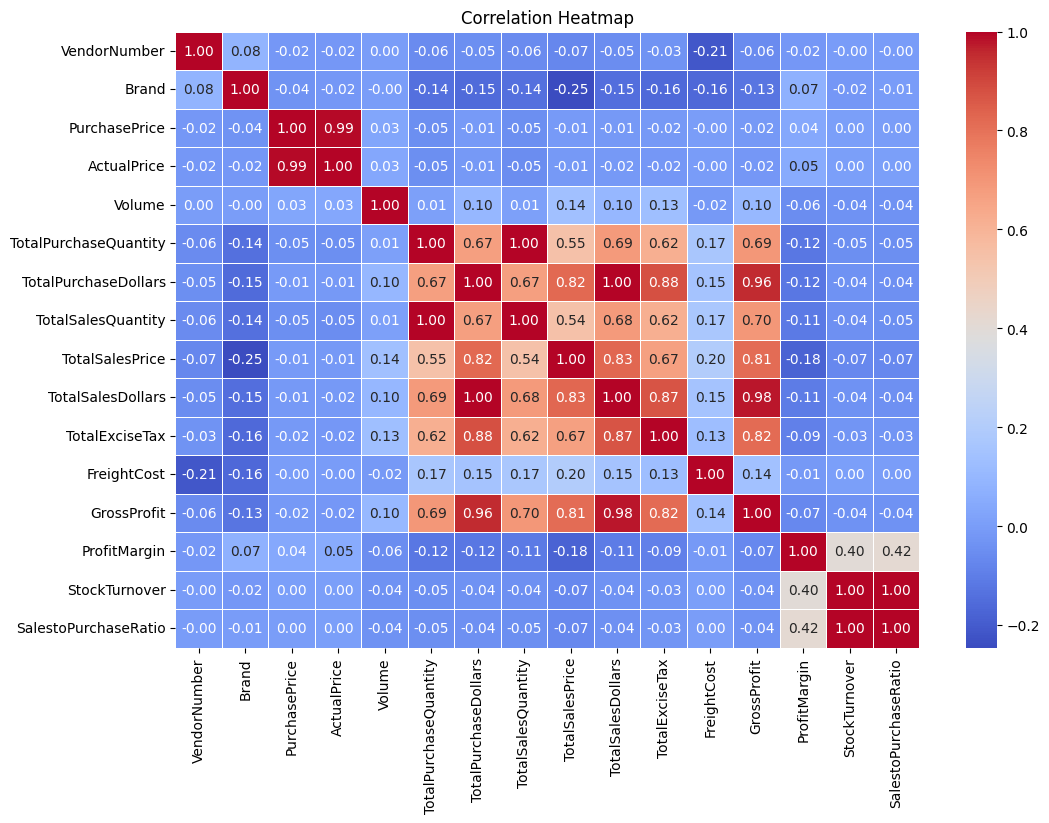

In [19]:
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,cmap="coolwarm",linewidths=0.5,annot=True,fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


---
Data Analysis

---

Identify Brands that need Promotional or Pricing adjustments which exhibit lower sales performance but higher profit margins

In [20]:
brand_performance = df.groupby('Description').agg({'TotalSalesDollars':'sum','ProfitMargin':'mean'}).reset_index()
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.089844,18.060661
1,.nparalleled Svgn Blanc,1094.630005,29.978167
2,10 Span Cab Svgn CC,2703.889893,20.937613
3,10 Span Chard CC,3325.560059,27.806444
4,10 Span Pnt Gris Monterey Cy,2082.219971,32.226181
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.030273,29.525675
7703,Zuccardi Q Malbec,1639.180054,23.981503
7704,Zum Rsl,10857.339844,32.675037
7705,Zwack Liqueur,227.880005,16.653502


In [21]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_profit_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [22]:
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_profit_threshold)
]

print("Brands with low sales and high profit margins")
target_brands.sort_values('TotalSalesDollars')

Brands with low sales and high profit margins


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.990000,66.466469
2369,Debauchery Pnt Nr,11.580000,65.975822
2070,Concannon Glen Ellen Wh Zin,15.950000,83.448273
2188,Crown Royal Apple,27.860001,89.806175
6237,Sauza Sprklg Wild Berry Marg,27.959999,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.679993,76.747314
2271,Dad's Hat Rye Whiskey,538.890015,81.851585
57,A Bichot Clos Marechaudes,539.940002,67.740860
6245,Sbragia Home Ranch Merlot,549.750000,66.444748


In [23]:
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<10000]

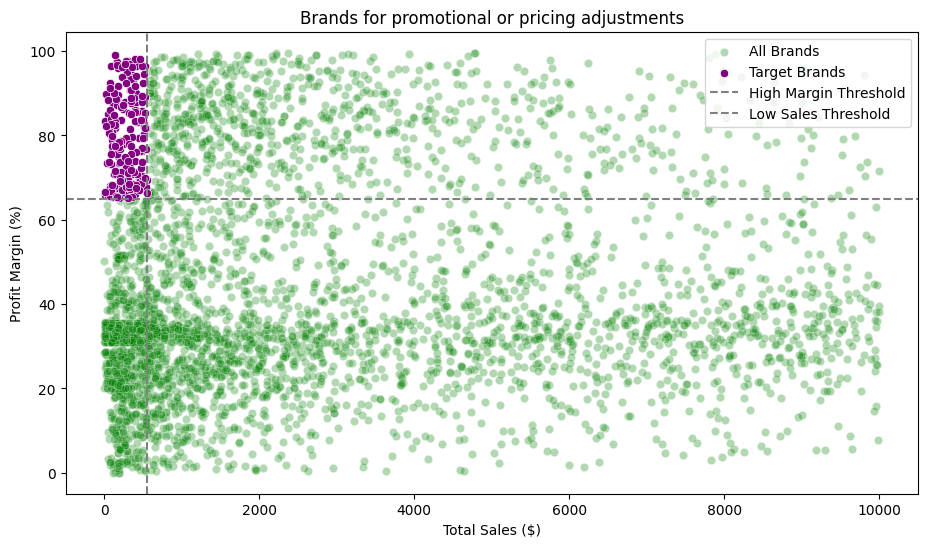

In [53]:
plt.figure(figsize=(11,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars',y='ProfitMargin',color='green', label='All Brands',alpha=0.3)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='ProfitMargin',color='purple', label='Target Brands' )

plt.axhline(high_profit_threshold,linestyle='--',color='grey',label='High Margin Threshold')
plt.axvline(low_sales_threshold,linestyle='--',color='grey',label='Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brands for promotional or pricing adjustments')
plt.legend()
plt.show()

Which Vendors and Brands demonstrate the highest Sales Performance?

In [25]:
## For Formatting the values of sales 

def format(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}k"
    else: return str(value)


In [26]:
top_vendors= df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands= df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [27]:
top_brands

Description
Jack Daniels No 7 Black    7.964747e+06
Tito's Handmade Vodka      7.399658e+06
Grey Goose Vodka           7.209608e+06
Capt Morgan Spiced Rum     6.356321e+06
Absolut 80 Proof           6.244752e+06
Jameson Irish Whiskey      5.715760e+06
Ketel One Vodka            5.070083e+06
Baileys Irish Cream        4.150122e+06
Kahlua                     3.604859e+06
Tanqueray                  3.456698e+06
Name: TotalSalesDollars, dtype: float64

In [28]:
top_brands.apply(lambda x: format(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

C:\Users\Dhruv Mavani\AppData\Local\Temp\ipykernel_16600\2104120590.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Purples_r")
C:\Users\Dhruv Mavani\AppData\Local\Temp\ipykernel_16600\2104120590.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="BuGn_r")


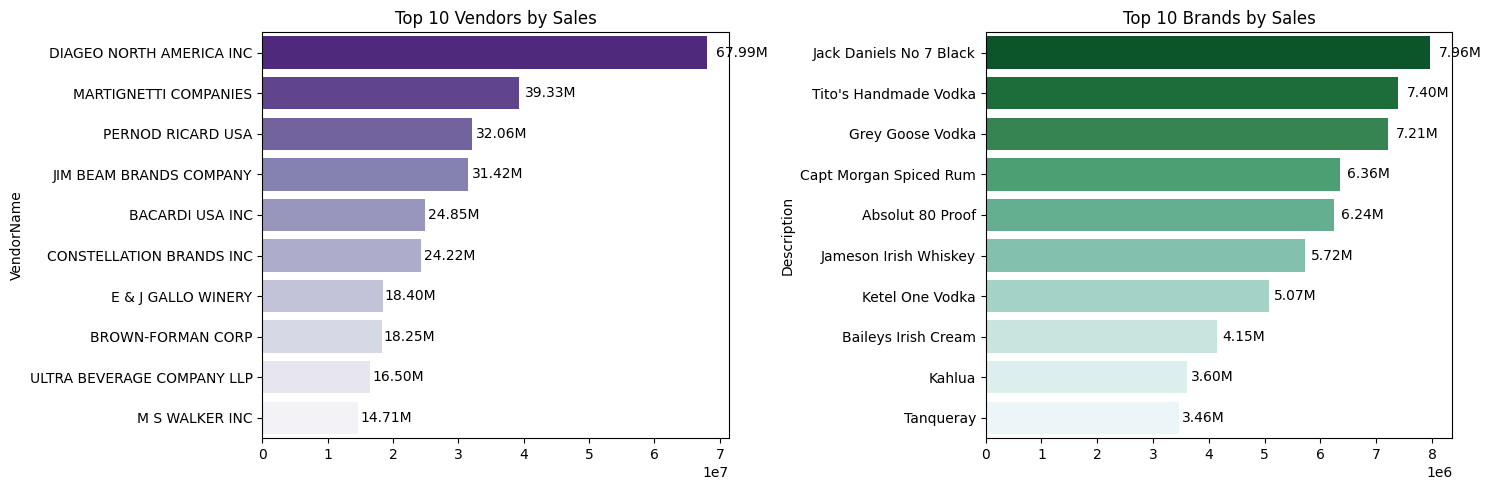

In [29]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Purples_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="BuGn_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Which Vendors contribute the most to total purchase dollars?

In [30]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [31]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [32]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [33]:
#Top 10 vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format) 
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format) 
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format) 
top_vendors

C:\Users\Dhruv Mavani\AppData\Local\Temp\ipykernel_16600\2682992390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format)
C:\Users\Dhruv Mavani\AppData\Local\Temp\ipykernel_16600\2682992390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format)
C:\Users\Dhruv Mavani\AppData\Local\Temp\ipykernel_16600\2682992390.py:5: SettingWithCopyWarning: 
A v

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [34]:
top_vendors['Cumulative_Contribution%']=top_vendors['PurchaseContribution%'].cumsum()
top_vendors

C:\Users\Dhruv Mavani\AppData\Local\Temp\ipykernel_16600\924320669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['Cumulative_Contribution%']=top_vendors['PurchaseContribution%'].cumsum()


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


C:\Users\Dhruv Mavani\AppData\Local\Temp\ipykernel_16600\2146958305.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="crest", ax=ax1)
C:\Users\Dhruv Mavani\AppData\Local\Temp\ipykernel_16600\2146958305.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)


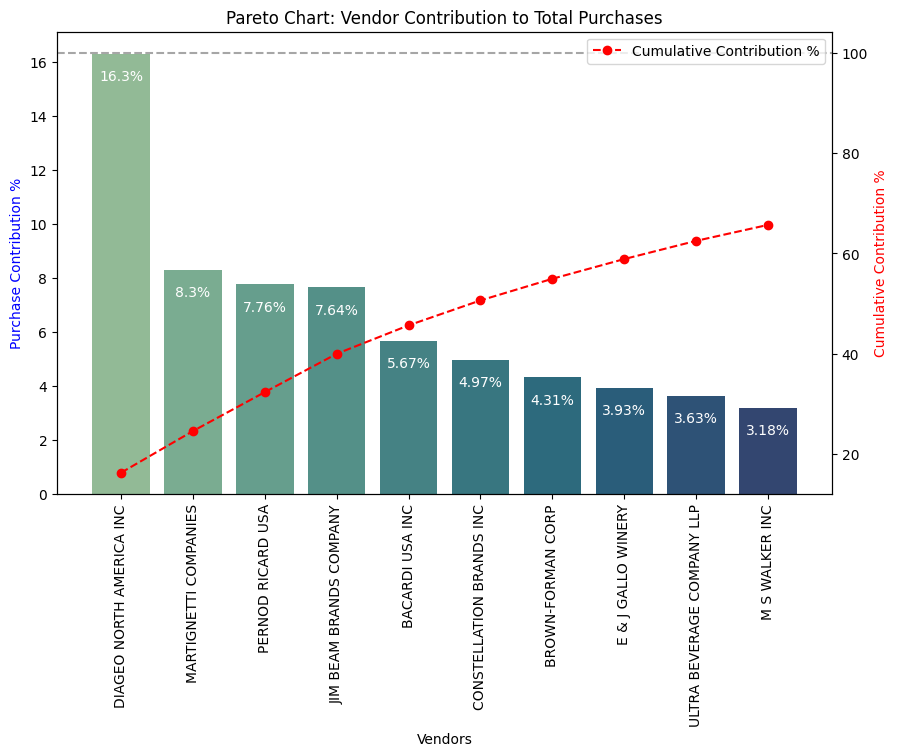

In [35]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="crest", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


How much of total Procurement is dependent on Top Vendors ?

In [36]:
print(f"Purchase Contribution of Top 10 Vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Purchase Contribution of Top 10 Vendors is 65.69 %


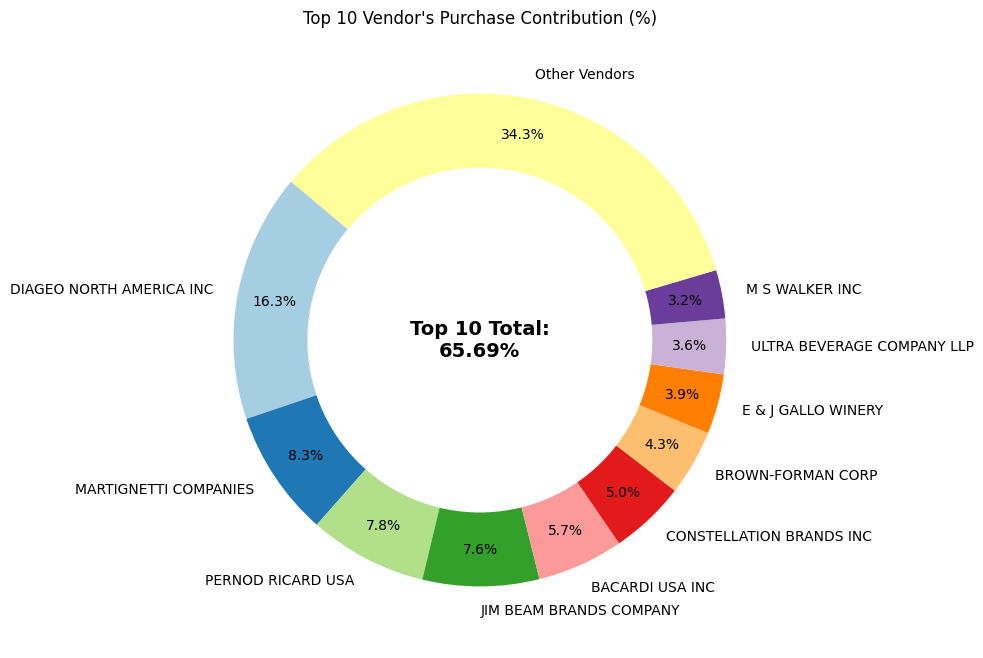

In [37]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()


Does Purchasing in bulk reduses the Unit price, and what is the optimal purchase volume for cost savings ?

In [38]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.270000,36.990002,1750.0,145080,3811251.50,142049.0,672819.31250,5101919.5,260999.203125,68601.679688,1290667.875,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.190001,28.990000,1750.0,164038,3804041.25,160247.0,561512.37500,4819073.5,294438.656250,144929.234375,1015032.250,21.062809,0.976889,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.240000,24.990000,1750.0,187407,3418303.75,187140.0,461140.15625,4538120.5,343854.062500,123780.218750,1119816.875,24.675785,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.170000,22.990000,1750.0,201682,3261198.00,200412.0,420050.00000,4475973.0,368242.812500,257032.062500,1214775.000,27.139908,0.993703,1.372494
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.889999,29.990000,1750.0,138109,3023206.00,135838.0,545778.25000,4223107.5,249587.828125,257032.062500,1199901.625,28.412764,0.983556,1.396897


In [39]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [40]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'],q=3,labels=['Small','Medium','Large'])

In [41]:
df.groupby('OrderSize')['UnitPurchasePrice'].mean()

C:\Users\Dhruv Mavani\AppData\Local\Temp\ipykernel_16600\2521394752.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('OrderSize')['UnitPurchasePrice'].mean()


OrderSize
Small     39.068186
Medium    15.486414
Large     10.777625
Name: UnitPurchasePrice, dtype: float64

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

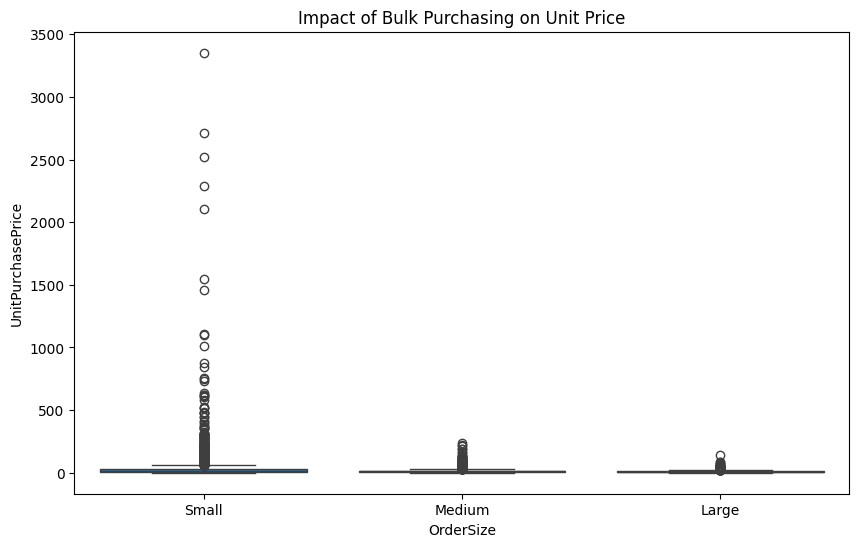

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='OrderSize',y='UnitPurchasePrice')
plt.title('Impact of Bulk Purchasing on Unit Price')
plt.xlable('Order size')
plt.ylabel('Average Unit Purchase Price')
plt.show()


---
Information Extracted

---

- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between Small and Large orders is substantial (~72% reduction in unit cost)
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

---

Which Vendors have low Inventory Turnover , indicating excess stock and slow moving products ?

In [43]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much Capital is locked in unsold inventory per vendor , and which vendors contribute the most to it ?

In [44]:
df['UnsoldInventoryValue']= (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print("Total Unsold Capital : ", format(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital :  2.71M


In [45]:
inventory_per_vendor= df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()
inventory_per_vendor=inventory_per_vendor.sort_values(by='UnsoldInventoryValue',ascending=False)
inventory_per_vendor['UnsoldInventoryValue']=inventory_per_vendor['UnsoldInventoryValue'].apply(format)
inventory_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21k
46,JIM BEAM BRANDS COMPANY,554.67k
68,PERNOD RICARD USA,470.63k
116,WILLIAM GRANT & SONS INC,401.96k
30,E & J GALLO WINERY,228.28k
79,SAZERAC CO INC,198.44k
11,BROWN-FORMAN CORP,177.73k
20,CONSTELLATION BRANDS INC,133.62k
61,MOET HENNESSY USA INC,126.48k
77,REMY COINTREAU USA INC,118.60k


What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors ?

In [48]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [49]:
top_vendors=df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors=df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [50]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


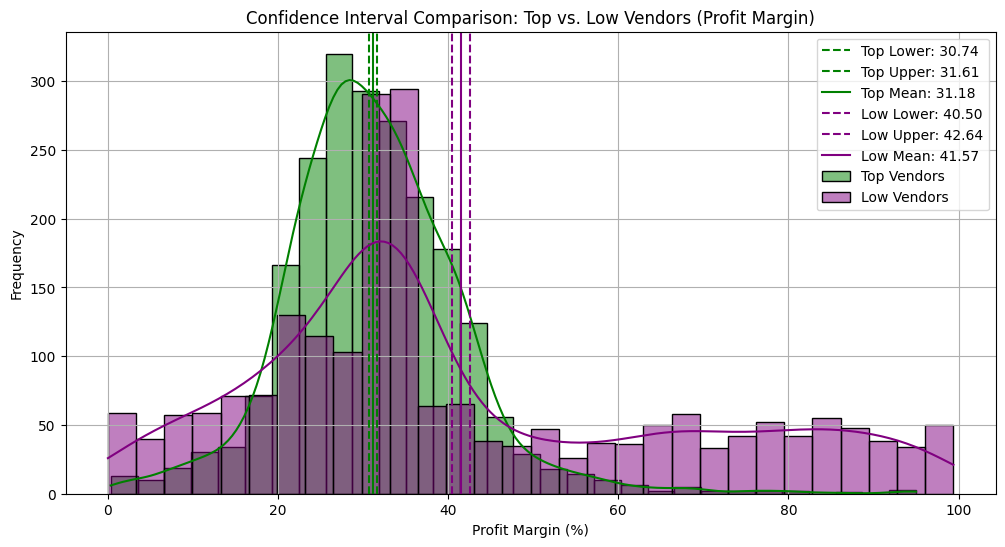

In [ ]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors 
sns.histplot(top_vendors, kde=True, color="green", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="green", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="green", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="green", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors 
sns.histplot(low_vendors, kde=True, color="purple", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="purple", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="purple", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="purple", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()



---
- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).

- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.

- For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.

- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

---



Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

- H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

- H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.


In [55]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")


T-Statistic: -17.6695, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.
